In [64]:
import pandas as pd
import numpy as np

### Clean Demographics CSV

In [199]:
dem = pd.read_csv('data/DEMOGRAPHICS.csv')
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,Min_Population_Size,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,28447,...,17.3,0.5,0.1,1.1,0.6,0.2,2.2,1.7,0.8,19.2
1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,118395,...,14.1,0.5,0.1,1.1,0.4,0.4,3.3,2.3,0.8,13.7
2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,27269,...,50.7,0.4,0.2,7.1,0.3,0.2,2.3,3.1,1.0,67.7
3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,8134,...,35.4,0.3,0.1,2.6,0.1,0.1,1.5,1.4,1.2,46.9
4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,29009,...,20.5,0.5,0.1,0.9,0.2,0.3,2.2,6.3,0.8,6.3


In [200]:
dem = dem[dem.columns.drop(list(dem.filter(regex='Min')))]
dem = dem[dem.columns.drop(list(dem.filter(regex='Max')))]
dem = dem.drop(columns=['Strata_ID_Number','Strata_Determining_Factors','Number_Counties'])

In [201]:
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,AL,48612,82,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7
1,1,3,Baldwin,Alabama,AL,162586,102,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3
2,1,5,Barbour,Alabama,AL,28414,32,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1
3,1,7,Bibb,Alabama,AL,21516,35,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4
4,1,9,Blount,Alabama,AL,55725,86,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3


In [202]:
def perc_to_num(df, list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].multiply(dem['Population_Size'],axis='index').div(100)

In [204]:
perc_to_num(dem, ['Age_19_Under','Age_19_64','Age_65_84','Age_85_and_Over','Black','White', 'Native_American','Asian','Hispanic'])

In [205]:
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,AL,48612,82,10.4,6.356810e+06,1.472228e+07,4763.976,437.508,39229.884,8409.876,243.060,291.672,826.404
1,1,3,Baldwin,Alabama,AL,162586,102,10.2,6.212039e+07,1.593983e+08,23574.970,2926.548,143726.024,16096.014,812.930,650.344,3739.478
2,1,5,Barbour,Alabama,AL,28414,32,22.1,1.961874e+06,5.045971e+06,3296.024,454.624,14832.108,13297.752,113.656,85.242,880.834
3,1,7,Bibb,Alabama,AL,21516,35,16.8,1.138828e+06,2.930399e+06,2345.244,258.192,16524.288,4841.100,64.548,21.516,301.224
4,1,9,Blount,Alabama,AL,55725,86,11.9,7.607925e+06,1.928376e+07,6742.725,724.425,54108.975,835.875,278.625,111.450,3510.675


In [208]:
namedcolumns = list(dem.columns)

In [206]:
perc_to_num(dem, ['Poverty'])

In [207]:
dem.describe()

,State_FIPS_Code,County_FIPS_Code,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
count,3141.000000,3141.000000,3.141000e+03,3141.000000,3.141000e+03,3.141000e+03,3.141000e+03,3141.000000,3141.000000,3.141000e+03,3.141000e+03,3141.000000,3.141000e+03,3.141000e+03
mean,30.304680,103.716651,9.436816e+04,249.119389,1.176929e+04,2.835725e+08,6.305517e+08,10089.331974,1621.797751,7.572862e+04,1.207006e+04,914.653692,4.201158e+03,1.339868e+04
std,15.134423,107.999484,3.064317e+05,1703.041884,4.708558e+04,5.455172e+09,1.158840e+10,29338.196261,4925.212428,2.287225e+05,5.604236e+04,3971.354953,3.418882e+04,1.077090e+05
min,1.000000,1.000000,6.200000e+01,-2222.000000,-2.466642e+03,1.724940e+00,2.106512e+01,12.987000,0.992000,4.595400e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,18.000000,35.000000,1.121100e+04,17.000000,1.486762e+03,2.993863e+05,7.457692e+05,1470.832000,233.748000,9.301040e+03,7.926600e+01,38.368000,3.277500e+01,1.962240e+02
50%,29.000000,79.000000,2.523500e+04,44.000000,3.385224e+03,1.566267e+06,3.858986e+06,3168.648000,492.168000,2.215833e+04,7.084920e+02,122.430000,1.149850e+02,6.370700e+02
75%,45.000000,133.000000,6.404000e+04,109.000000,7.980630e+03,1.031223e+07,2.554967e+07,7624.047000,1113.232000,5.697044e+04,5.140575e+03,446.995000,5.646150e+02,3.059418e+03
max,56.000000,840.000000,9.935475e+06,69390.000000,1.758579e+06,2.852825e+11,6.021533e+11,864386.325000,139096.650000,7.362187e+06,1.400172e+06,109290.225000,1.331354e+06,4.610060e+06


In [218]:
cleandem = dem[dem['Poverty'] > 0]
cleandem = dem[dem['Population_Density'] > 0]

In [219]:
cleandem.describe()

,State_FIPS_Code,County_FIPS_Code,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
count,3113.000000,3113.000000,3.113000e+03,3113.000000,3.113000e+03,3.113000e+03,3.113000e+03,3113.000000,3113.000000,3.113000e+03,3.113000e+03,3113.000000,3.113000e+03,3.113000e+03
mean,30.407003,103.358818,9.516995e+04,252.073884,1.186910e+04,2.861204e+08,6.362178e+08,10176.731243,1636.057179,7.638281e+04,1.217823e+04,905.690876,4.237517e+03,1.351626e+04
std,15.061158,107.795362,3.076889e+05,1709.952623,4.728505e+04,5.479592e+09,1.164026e+10,29455.297724,4945.012260,2.296436e+05,5.628225e+04,3976.081700,3.434010e+04,1.081853e+05
min,1.000000,1.000000,1.110000e+02,1.000000,-2.466642e+03,1.724940e+00,1.014018e+02,12.987000,4.039000,4.595400e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,19.000000,35.000000,1.141000e+04,17.000000,1.513974e+03,3.182450e+05,7.750411e+05,1504.264000,240.870000,9.588816e+03,8.264000e+01,38.586000,3.347100e+01,1.992600e+02
50%,29.000000,79.000000,2.556300e+04,45.000000,3.420360e+03,1.623313e+06,3.972716e+06,3203.739000,499.785000,2.246059e+04,7.426500e+02,122.430000,1.166850e+02,6.520800e+02
75%,45.000000,133.000000,6.474600e+04,111.000000,8.058120e+03,1.057320e+07,2.593247e+07,7670.026000,1121.872000,5.740279e+04,5.259464e+03,443.424000,5.726800e+02,3.102666e+03
max,56.000000,840.000000,9.935475e+06,69390.000000,1.758579e+06,2.852825e+11,6.021533e+11,864386.325000,139096.650000,7.362187e+06,1.400172e+06,109290.225000,1.331354e+06,4.610060e+06


### Clean Leading Causes of Death CSV

In [251]:
deathcause = pd.read_csv('data/LEADINGCAUSESOFDEATH.csv')
deathcause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Columns: 235 entries, State_FIPS_Code to LCD_Time_Span
dtypes: int64(231), object(4)
memory usage: 5.6+ MB


In [252]:
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='Min')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='Max')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='CI')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='Injury')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='Homicide')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='HIV')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='BirthDef')))]
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='Comp')))]
deathcause = deathcause.drop(columns=['Strata_ID_Number'])

In [253]:
deathcause = deathcause[deathcause.columns.drop(list(deathcause.filter(regex='homicide')))]

In [263]:
deathcause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 46 columns):
State_FIPS_Code     3141 non-null int64
County_FIPS_Code    3141 non-null int64
CHSI_County_Name    3141 non-null object
CHSI_State_Name     3141 non-null object
CHSI_State_Abbr     3141 non-null object
B_Wh_Cancer         3141 non-null int64
B_Bl_Cancer         3141 non-null int64
B_Ot_Cancer         3141 non-null int64
B_Hi_Cancer         3141 non-null int64
C_Wh_Suicide        3141 non-null int64
C_Bl_Suicide        3141 non-null int64
C_Ot_Suicide        3141 non-null int64
C_Hi_Suicide        3141 non-null int64
C_Wh_Cancer         3141 non-null int64
C_Bl_Cancer         3141 non-null int64
C_Ot_Cancer         3141 non-null int64
C_Hi_Cancer         3141 non-null int64
D_Wh_Cancer         3141 non-null int64
D_Bl_Cancer         3141 non-null int64
D_Ot_Cancer         3141 non-null int64
D_Hi_Cancer         3141 non-null int64
D_Wh_HeartDis       3141 non-null int64
D_Bl_Heart

In [264]:
cleandeath['B_Cancer'] = deathcause['B_Bl_Cancer'] + deathcause['C_Bl_Cancer'] + deathcause['D_Bl_Cancer'] + deathcause['E_Bl_Cancer'] + deathcause['F_Bl_Cancer']

In [265]:
cleandeath['B_Bl_Cancer'] = deathcause[deathcause['B_Bl_Cancer'] > 0]
cleandeath['C_Bl_Cancer'] = deathcause[deathcause['C_Bl_Cancer'] > 0]
cleandeath['D_Bl_Cancer'] = deathcause[deathcause['D_Bl_Cancer'] > 0]
cleandeath['E_Bl_Cancer'] = deathcause[deathcause['E_Bl_Cancer'] > 0]
cleandeath['F_Bl_Cancer'] = deathcause[deathcause['F_Bl_Cancer'] > 0]

In [266]:
cleandeath['B_Cancer'] = cleandeath['B_Bl_Cancer'] + cleandeath['C_Bl_Cancer'] + cleandeath['D_Bl_Cancer'] + cleandeath['E_Bl_Cancer'] + cleandeath['F_Bl_Cancer']

In [267]:
cleandeath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 50 to 2968
Data columns (total 47 columns):
State_FIPS_Code     38 non-null int64
County_FIPS_Code    38 non-null int64
CHSI_County_Name    38 non-null object
CHSI_State_Name     38 non-null object
CHSI_State_Abbr     38 non-null object
B_Wh_Cancer         38 non-null int64
B_Bl_Cancer         38 non-null object
B_Ot_Cancer         38 non-null int64
B_Hi_Cancer         38 non-null int64
C_Wh_Suicide        38 non-null int64
C_Bl_Suicide        38 non-null int64
C_Ot_Suicide        38 non-null int64
C_Hi_Suicide        38 non-null int64
C_Wh_Cancer         38 non-null int64
C_Bl_Cancer         1 non-null object
C_Ot_Cancer         38 non-null int64
C_Hi_Cancer         38 non-null int64
D_Wh_Cancer         38 non-null int64
D_Bl_Cancer         31 non-null object
D_Ot_Cancer         38 non-null int64
D_Hi_Cancer         38 non-null int64
D_Wh_HeartDis       38 non-null int64
D_Bl_HeartDis       38 non-null int64
D_Ot_HeartDis  

In [259]:
cleandeath.drop(columns=['F_Bl_Cancer','E_Bl_Cancer','D_Bl_Cancer','C_Bl_Cancer','B_Bl_Cancer','F_Bl_Cancer'])

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,B_Wh_Cancer,B_Ot_Cancer,B_Hi_Cancer,C_Wh_Suicide,C_Bl_Suicide,...,E_Hi_HeartDis,F_Wh_HeartDis,F_Bl_HeartDis,F_Ot_HeartDis,F_Hi_HeartDis,F_Wh_Cancer,F_Ot_Cancer,F_Hi_Cancer,LCD_Time_Span,B_Cancer
50,1,101,Montgomery,Alabama,AL,-1111,-1111,-1111,11,-1111,...,-1111,30,28,-1111,-1111,22,-1111,-1111,2001-2003,NaN
184,6,1,Alameda,California,CA,14,17,-1111,12,-1111,...,14,31,31,28,28,22,24,22,2001-2003,NaN
190,6,13,Contra Costa,California,CA,19,-1111,23,10,-1111,...,16,29,32,29,28,23,23,21,2001-2003,NaN
202,6,37,Los Angeles,California,CA,20,23,21,-1111,-1111,...,21,37,38,33,35,21,24,21,2001-2003,NaN
315,10,3,New Castle,Delaware,DE,21,-1111,-1111,17,12,...,29,32,33,22,19,24,30,23,2001-2003,50
317,11,1,Washington,District of Columbia,DC,-1111,-1111,-1111,-1111,-1111,...,19,34,38,36,32,24,28,19,2001-2003,NaN
428,13,89,DeKalb,Georgia,GA,-1111,-1111,-1111,18,-1111,...,24,25,25,28,19,20,26,26,2001-2003,NaN
674,17,163,St. Clair,Illinois,IL,-1111,-1111,-1111,10,-1111,...,-1111,29,27,-1111,19,22,-1111,19,2001-2003,NaN
1046,21,111,Jefferson,Kentucky,KY,20,-1111,-1111,16,11,...,-1111,31,32,25,39,23,29,29,2001-2003,NaN
1119,22,17,Caddo,Louisiana,LA,-1111,-1111,-1111,17,-1111,...,-1111,29,29,-1111,10,21,-1111,15,2001-2003,NaN


In [88]:
drops = deathcause[deathcause[('B_Bl_Cancer')] != -1111]

In [232]:
df1 = pd.merge(cleandem, cleandeath, on='County_FIPS_Code')

In [235]:
df1.describe()

,State_FIPS_Code_x,County_FIPS_Code,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,...,E_Ot_HeartDis,E_Hi_HeartDis,F_Wh_HeartDis,F_Bl_HeartDis,F_Ot_HeartDis,F_Hi_HeartDis,F_Wh_Cancer,F_Bl_Cancer,F_Ot_Cancer,F_Hi_Cancer
count,1276.000000,1276.000000,1.276000e+03,1276.000000,1.276000e+03,1.276000e+03,1.276000e+03,1276.000000,1276.000000,1.276000e+03,...,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
mean,29.934953,48.526646,1.442881e+05,397.627743,1.859655e+04,7.867025e+08,1.726323e+09,15058.316222,2459.677875,1.110742e+05,...,-265.710815,-312.479624,33.433386,32.272727,-137.442006,-45.670846,21.789185,23.557210,-141.705329,-50.629310
std,15.057474,53.228948,5.109662e+05,2706.020983,8.381484e+04,1.162804e+10,2.462433e+10,47333.636398,7884.433194,3.771067e+05,...,493.344150,515.372263,7.187644,5.716511,403.625684,281.236256,1.363470,1.372796,401.836208,279.852804
min,1.000000,1.000000,1.110000e+02,1.000000,-2.466642e+03,1.724940e+00,1.014018e+02,12.987000,4.039000,4.595400e+01,...,-1111.000000,-1111.000000,25.000000,25.000000,-1111.000000,-1111.000000,19.000000,20.000000,-1111.000000,-1111.000000
25%,18.000000,7.000000,1.342600e+04,18.000000,1.761714e+03,4.437887e+05,1.093653e+06,1743.510000,273.156000,1.123678e+04,...,-1111.000000,-1111.000000,29.000000,29.000000,24.000000,19.000000,21.000000,23.000000,21.000000,19.000000
50%,29.000000,33.000000,3.439750e+04,49.000000,4.153200e+03,2.822089e+06,7.213479e+06,4103.697000,622.269000,2.982531e+04,...,19.000000,17.000000,32.000000,31.000000,28.000000,28.000000,22.000000,23.000000,24.000000,21.000000
75%,42.000000,81.000000,9.064300e+04,141.000000,1.070166e+04,2.064141e+07,5.014799e+07,10070.538000,1542.359000,7.844646e+04,...,24.000000,21.000000,35.000000,34.000000,32.000000,35.000000,23.000000,24.000000,27.000000,25.000000
max,56.000000,760.000000,9.935475e+06,69390.000000,1.758579e+06,2.852825e+11,6.021533e+11,864386.325000,139096.650000,7.362187e+06,...,36.000000,29.000000,56.000000,53.000000,45.000000,50.000000,24.000000,28.000000,31.000000,40.000000


### Stats

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [160]:
df1.describe()

,State_FIPS_Code_x,Population_Size,Population_Density,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic,B_Wh_Cancer,B_Bl_Cancer
count,93183.000000,9.318300e+04,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000,93183.000000
mean,29.961077,1.036002e+05,255.710097,11.886420,24.597708,60.435714,12.826587,2.140376,87.509290,8.441046,1.908180,1.202901,6.189839,1.378427,1.378427
std,14.977616,3.320745e+05,1870.174448,51.465164,3.218202,3.293418,3.272223,0.938132,15.667623,14.217008,6.949971,3.167028,10.829115,8.775242,8.775242
min,1.000000,6.200000e+01,-2222.000000,-2222.200000,1.400000,47.600000,2.100000,0.100000,4.700000,0.000000,0.000000,0.000000,0.000000,-2222.000000,-2222.000000
25%,19.000000,1.183400e+04,17.000000,9.700000,22.600000,58.500000,10.700000,1.500000,83.750000,0.400000,0.200000,0.300000,1.100000,0.000000,0.000000
50%,29.000000,2.799500e+04,45.000000,12.300000,24.400000,60.400000,12.500000,2.000000,94.400000,1.700000,0.400000,0.500000,2.200000,0.000000,0.000000
75%,42.000000,7.055700e+04,111.000000,15.700000,26.200000,62.400000,14.700000,2.600000,97.700000,9.500000,1.000000,1.000000,5.700000,0.000000,0.000000
max,56.000000,9.935475e+06,69390.000000,36.200000,47.200000,83.300000,29.200000,7.600000,100.000000,86.000000,93.400000,55.900000,97.500000,35.000000,35.000000


In [146]:
def drop_n_plot(df, list_of_cols):
    for col in list_of_cols:
        print(f'{col} values dropped: {df[col].loc[(df[col] == -1111)].count()}')
        dropped = df[col].loc[(df[col] != -1111)]
        dropped.hist(bins=20,)
        plt.title(col)
        plt.show()
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

In [164]:
def drop_n_plots(df, list_of_cols):
    for col in list_of_cols:
        print(f'{col} values dropped: {df[col].loc[(df[col] == -2222.2)].count()}')
        dropped = df[col].loc[(df[col] != -2222.2)]
        dropped.hist(bins=20,)
        plt.title(col)
        plt.show()
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

Poverty values dropped: 49


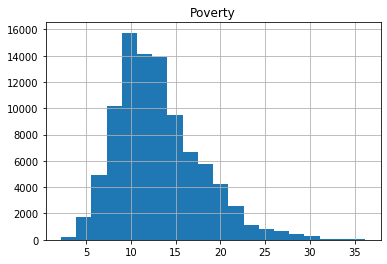

Median is 12.3
Mean is 13.06182597118081


In [165]:
drop_n_plots(df1,['Poverty'])

In [149]:
df1['B_Wh_Cancer'] = df1.B_Wh_Cancer.astype(float)
df1['B_Bl_Cancer'] = df1.B_Wh_Cancer.astype(float)

In [167]:
df1.B_Bl_Cancer.describe()

count    93183.000000
mean         1.378427
std          8.775242
min      -2222.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: B_Bl_Cancer, dtype: float64

In [172]:
df1 = df1[df1[('B_Bl_Cancer')] != -2222]

In [174]:
df1 = df1[df1[('Poverty')] != -2222.2]

In [168]:
def drop_n_plot2(df, list_of_cols):
    for col in list_of_cols:
        print(f'{col} values dropped: {df[col].loc[(df[col] == -2222)].count()}')
        dropped = df[col].loc[(df[col] != -2222)]
        dropped.hist(bins=20,)
        plt.title(col)
        plt.show()
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

B_Bl_Cancer values dropped: 1


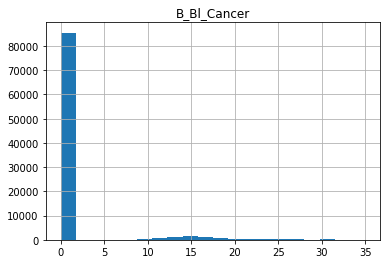

Median is 0.0
Mean is 1.4022879955356184


In [169]:
drop_n_plot2(df1, ['B_Bl_Cancer'])

In [171]:
df1.B_Bl_Cancer.describe()

count    93183.000000
mean         1.378427
std          8.775242
min      -2222.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: B_Bl_Cancer, dtype: float64

In [154]:
def drops_n_plot(df, list_of_cols):
    for col in list_of_cols:
        print(f'{col} values dropped: {df[col].loc[(df[col] == 0)].count()}')
        dropped = df[col].loc[(df[col] != 0)]
        dropped.hist(bins=20,)
        plt.title(col)
        plt.show()
        print(f'Median is {dropped.median()}')
        print(f'Mean is {dropped.mean()}')

B_Wh_Cancer values dropped: 85506


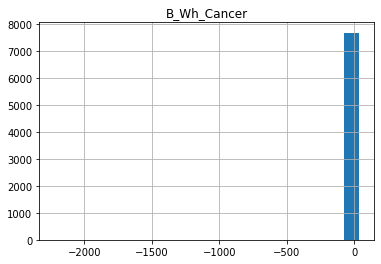

Median is 16.0
Mean is 16.731275237723068
B_Bl_Cancer values dropped: 85506


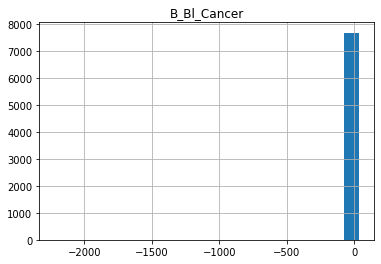

Median is 16.0
Mean is 16.731275237723068


In [155]:
drops_n_plot(df1,['B_Wh_Cancer','B_Bl_Cancer'])

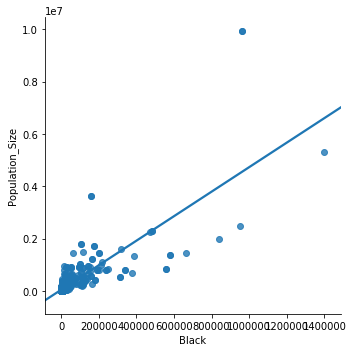

In [239]:
sns.lmplot(x='Black', y='Population_Size', data=df1, ci=None)